In [409]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [410]:
bankdata = pd.read_csv("bill_authentication.csv")
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,1


In [411]:
bankdata.shape

(1372, 5)

In [412]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [413]:
bankdata.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [414]:
bankdata.corr()

,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.264026,-0.380850,0.276817,-0.679587
Skewness,0.264026,1.000000,-0.786895,-0.526321,-0.413439
Curtosis,-0.380850,-0.786895,1.000000,0.318841,0.133664
Entropy,0.276817,-0.526321,0.318841,1.000000,-0.030585
Class,-0.679587,-0.413439,0.133664,-0.030585,1.000000


In [415]:
bankdata.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.446064
std,2.842763,5.869047,4.310030,2.101013,0.497264
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [416]:
#As we can see data is balanced it's equally distributed
bankdata['Class'].value_counts()

0    760
1    612
Name: Class, dtype: int64

<AxesSubplot:>

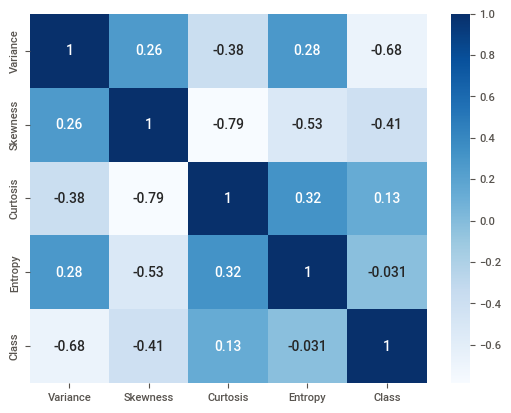

In [417]:
sns.heatmap(bankdata.corr(),annot=True,cmap="Blues")

<AxesSubplot:xlabel='Class', ylabel='count'>

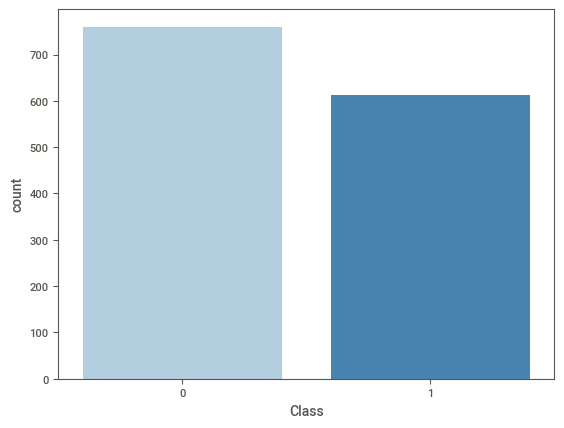

In [418]:
sns.countplot(bankdata["Class"],palette="Blues")

<AxesSubplot:>

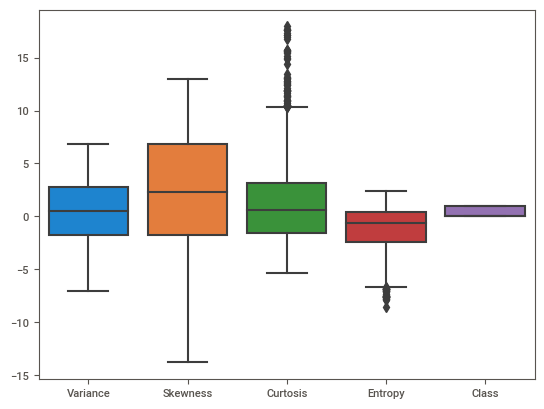

In [419]:
sns.boxplot(data= bankdata)

so there are so much outliers in curtosis and entropy column 

In [420]:
def find_outliers_IQR(data):
    Q1 = bankdata[['Curtosis','Entropy']].quantile(0.25)
    Q3 = bankdata[['Curtosis','Entropy']].quantile(0.75)

    IQR = Q3-Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
print(lower_limit, upper_limit)

Curtosis   -8.706312
Entropy    -6.625840
dtype: float64 Curtosis    10.310588
Entropy      4.607200
dtype: float64


In [421]:
bankdata.Curtosis[(bankdata['Curtosis']<lower_limit[0]) | (bankdata['Curtosis']>upper_limit[0])] = np.nan
bankdata.Entropy[(bankdata['Entropy']<lower_limit[1]) | (bankdata['Entropy']>upper_limit[1])]= np.nan

In [426]:
bankdata.isnull().sum()

Variance     0
Skewness     0
Curtosis    59
Entropy     33
Class        0
dtype: int64

In [427]:
bankdata.dropna(inplace=True)

<AxesSubplot:>

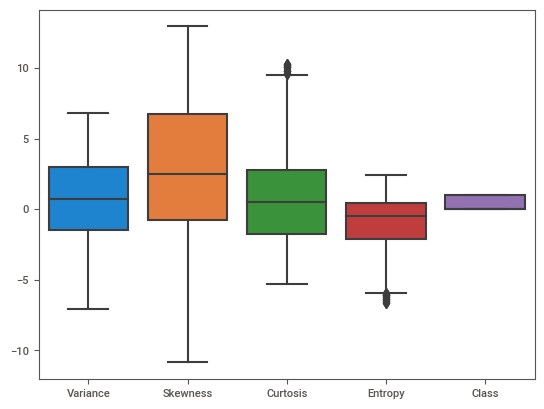

In [429]:
sns.boxplot(data = bankdata)

In [430]:
bankdata.shape

(1280, 5)

In [438]:
x = bankdata.iloc[:,0:4].values
y = bankdata['Class'].values

In [439]:
x.shape, y.shape

((1280, 4), (1280,))

In [441]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

In [442]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',random_state=42)
svclassifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [444]:
y_pred = svclassifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [445]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

     Actual  Predicted
0         1          1
1         0          0
2         1          1
3         1          1
4         0          0
..      ...        ...
315       1          1
316       1          1
317       0          0
318       0          0
319       0          0

[320 rows x 2 columns]


In [446]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[185   7]
 [  2 126]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       192
           1       0.95      0.98      0.97       128

    accuracy                           0.97       320
   macro avg       0.97      0.97      0.97       320
weighted avg       0.97      0.97      0.97       320



In [447]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)*100

97.1875